# CORE TASK 1

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import scipy

In [3]:
from scipy.integrate import solve_ivp
from scipy.integrate import odeint

Consider the second-order differential equation

$\frac{d^2\theta}{dt^2} = -\frac{g}{l}sin\theta-q\frac{d\theta}{dt}+Fsin(\Omega_D t)$

We can rewrite this as two coupled first-order equations:

$\frac{dy_0}{dt} = y_1$

$\frac{dy_1}{dt} = -\frac{g}{l}sin(y_0)-qy_1+Fsin(\Omega_D t)$

for the variables defined as $y_0 = \theta$ and $y_1 = \frac{d\theta}{dt}$.

Here, 

$\theta$ is the angular displacement of the pendulum bob,

$g$ is acceleration due to gravity,

$l=g$ is the length of the pendulum,

$q=\alpha/ml$ where $\alpha$ is the resistivity force coefficient and $m$ mass of 
pendulum,

$F=G/ml^2$ where G is the driving coupled force,

$\Omega_D = 2/3$ is the driving angular frequency 

In [4]:
# Define the system of ODEs

def pendulum(t, y, g, l, q, F, OmegaD):
    return [y[1], -g/l * np.sin(y[0]) - q*y[1] + F*np.sin(OmegaD*t)]

In [5]:
# Define the parameters

g = 9.81 # Acceleration due to gravity
l = g # Length of the pendulum, l = g here
q = 0 # Resistive force, q = a / ml
F = 0 # Driving force amplitude, F = G / ml^2
OmegaD = 2/3 # Frequency of the driving force (s^-1)

In [6]:
# Define the initial conditions at t = 0

theta0 = 0.01 # Initial angle
omega0 = 0.0 # Initial angular velocity

### Plotting solutions for 10 natural periods of oscillations

In [7]:
# Integrate the ODEs using scipy solve_ivp (method RK45 by default)

t_max = 10
pendulum_motion = solve_ivp(pendulum, [0, t_max], [theta0, omega0], args = (g, l, q, F, OmegaD), dense_output=True)

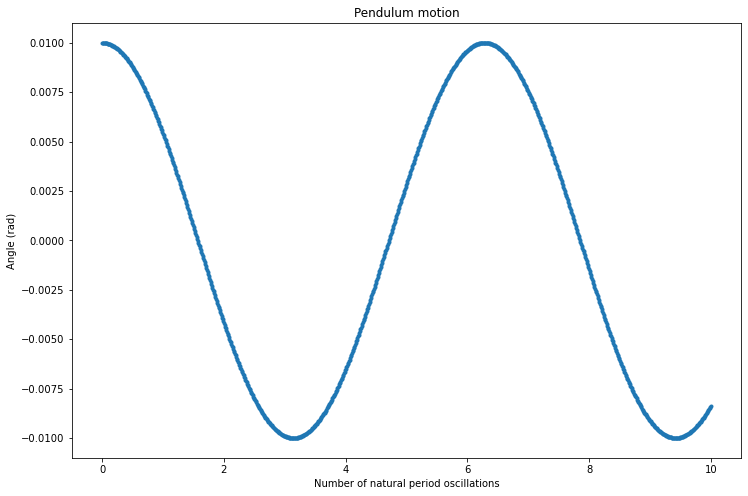

In [8]:
# Plot the motion of the pendulum

t = np.linspace(0, 10, 1000)
theta, omega = pendulum_motion.sol(t)

plt.figure(figsize=(12, 8))
plt.plot(t, theta, '.')
plt.xlabel('Number of natural period oscillations')
plt.ylabel('Angle (rad)')
plt.title('Pendulum motion');

### Compare with small angle oscillations

For small angle oscillations that are undamped and undriven, the equation of motion can be rewritten as 

$\frac{d^2\theta}{dt^2} = -\frac{g}{l}\sin\theta \approx -\frac{g}{l}\theta$

given that $\sin\theta\approx\theta$ for small angles.

The solution is a simple harmonic motion:

$\theta(t) = \theta_0\cos(\sqrt\frac{g}{l})$

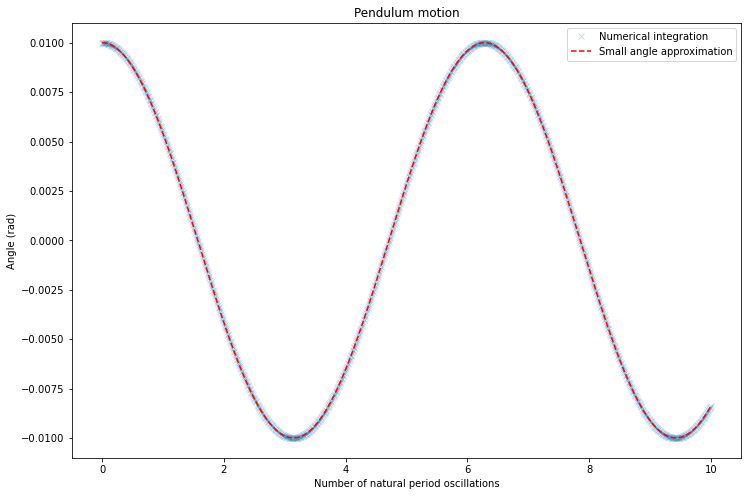

In [9]:
## Plot the above but overlay with small angle approximations.

# Plot out the time space
t = np.linspace(0, 10, 1000)

# Obtain the motion of the pendulum using numerical integration
theta, omega = pendulum_motion.sol(t)

# Obtain the motion of the pendulum using small angle approximation
theta_small = theta0 * np.cos(np.sqrt(g/l) * t)

# Plot both on the same plot
plt.figure(figsize=(12, 8))
plt.plot(t, theta, 'x', label='Numerical integration',alpha=0.25)
plt.plot(t, theta_small, 'r--', label='Small angle approximation')
plt.xlabel('Number of natural period oscillations')
plt.ylabel('Angle (rad)')
plt.legend()
plt.title('Pendulum motion');

### Plotting solutions for 100 natural periods of oscillations

In [10]:
# Integrate the ODEs using scipy solve_ivp (method RK45 by default)

t_max = 100
pendulum_motion = solve_ivp(pendulum, [0, t_max], [theta0, omega0], args = (g, l, q, F, OmegaD), dense_output=True)

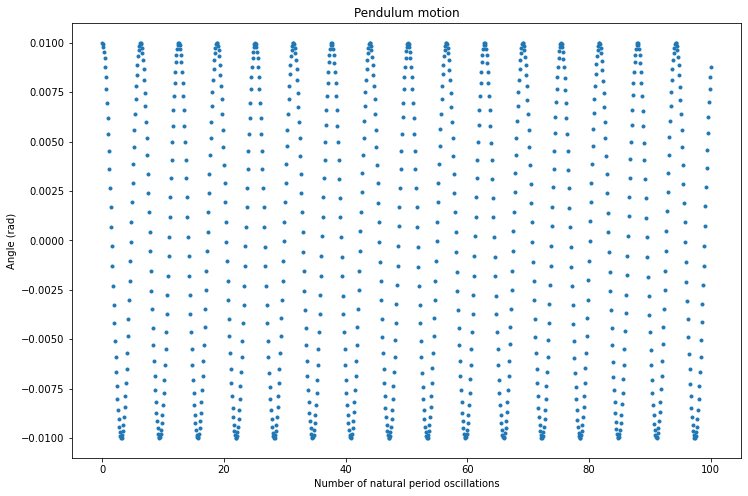

In [11]:
# Plot the motion of the pendulum

t = np.linspace(0, 100, 1000)
theta, omega = pendulum_motion.sol(t)

plt.figure(figsize=(12, 8))
plt.plot(t, theta, '.')
plt.xlabel('Number of natural period oscillations')
plt.ylabel('Angle (rad)')
plt.title('Pendulum motion');

### Plotting solutions for 1000 natural periods of oscillations

In [12]:
# Integrate the ODEs using scipy solve_ivp (method RK45 by default)

t_max = 1000
pendulum_motion = solve_ivp(pendulum, [0, t_max], [theta0, omega0], args = (g, l, q, F, OmegaD), dense_output=True)

Text(0.5, 1.0, 'Pendulum motion')

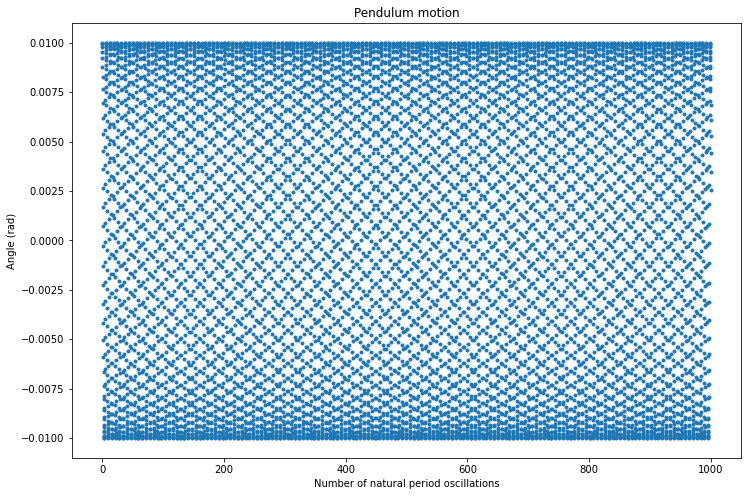

In [13]:
# Plot the motion of the pendulum

t = np.linspace(0, 1000, 10000)
theta, omega = pendulum_motion.sol(t)

## Plot only half of the data points to avoid cluttering the plot
# plt.figure(figsize=(16, 8))
# plt.plot(t[::3], theta[::3], '.')


plt.figure(figsize=(12, 8))
plt.plot(t, theta, '.')
plt.xlabel('Number of natural period oscillations')
plt.ylabel('Angle (rad)')
plt.title('Pendulum motion')

### Overlaying theoretical results for small-angle oscillations

--

### Is the energy conserved with the integrator?

Expression for total energy is given by

$E = T + U$, where

$T = \frac{1}{2}I\omega^2$, and

$U = mgh$

In [14]:
## Calculate total energy of the pendulum vs time for 10,000 oscillations

# Integrate the ODEs using scipy solve_ivp (method RK45 by default)
t_max = 10000
pendulum_motion = solve_ivp(pendulum, [0, t_max], [theta0, omega0], args = (g, l, q, F, OmegaD), dense_output=True)

# Obtain the motion of the pendulum
t = np.linspace(0, 10000, 10000)
theta, omega = pendulum_motion.sol(t)

# Calculate the total energy of the pendulum
m = 1 # Mass of the pendulum, set to 1 for simplicity (absorbed within the definition of F)
T = 0.5 * m * l**2 * omega**2 # Kinetic energy
U = m * g * l * (1 - np.cos(theta)) # Potential energy (h = l(1 - cos(theta))
E = T+U # Total energy

Text(0.5, 1.0, 'Pendulum motion')

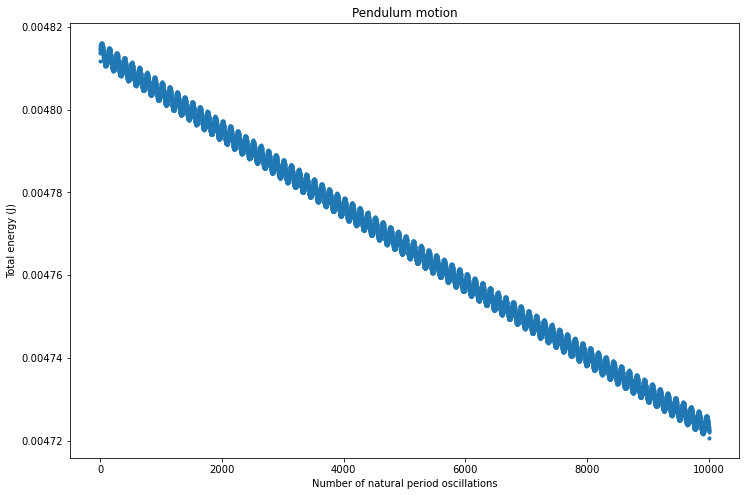

In [15]:
## Plot total energy of the pendulum vs time for 10,000 oscillations

# Plot the total energy of the pendulum
plt.figure(figsize=(12, 8))
plt.plot(t, E, '.')
plt.xlabel('Number of natural period oscillations')
plt.ylabel('Total energy (J)')
plt.title('Pendulum motion')

In [16]:
(E[0] - E[-1])/E[0]*100

1.8944465561321309

Conclusion: For 10,000 oscillations, the total energy of the system is not conserved from the integrator, changing by about 2%.

Text(0.5, 1.0, 'Pendulum motion')

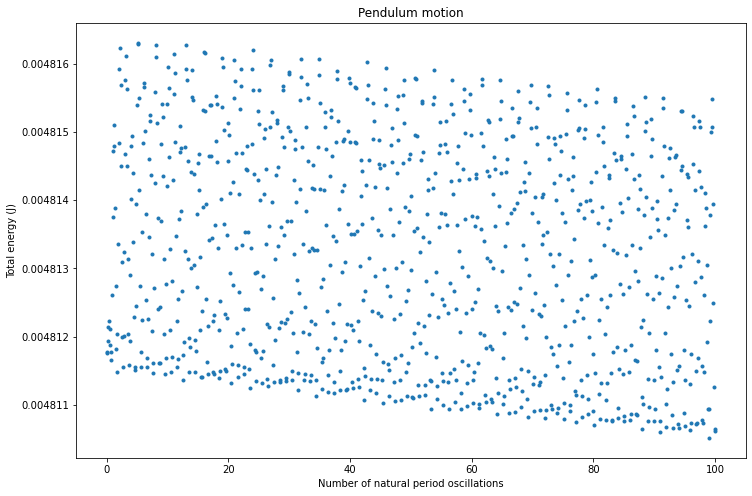

In [17]:
## Calculate total energy of the pendulum vs time for 100 oscillations

# Integrate the ODEs using scipy solve_ivp (method RK45 by default)
t_max = 100
pendulum_motion = solve_ivp(pendulum, [0, t_max], [theta0, omega0], args = (g, l, q, F, OmegaD), dense_output=True)

# Obtain the motion of the pendulum
t = np.linspace(0, 100, 1000)
theta, omega = pendulum_motion.sol(t)

# Calculate the total energy of the pendulum
m = 1 # Mass of the pendulum, set to 1 for simplicity (absorbed within the definition of F)
T = 0.5 * m * l**2 * omega**2 # Kinetic energy
U = m * g * l * (1 - np.cos(theta)) # Potential energy (h = l(1 - cos(theta))
E = T+U # Total energy

## Plot total energy of the pendulum vs time for 100 oscillations

# Plot the total energy of the pendulum
plt.figure(figsize=(12, 8))
plt.plot(t, E, '.')
plt.xlabel('Number of natural period oscillations')
plt.ylabel('Total energy (J)')
plt.title('Pendulum motion')

In [18]:
(E[0] - E[-1])/E[0]*100

0.023755498069193453

Conclusion: For 100 oscillations, the total energy of the system is still not conserved from the integrator, albeit less, changing by about 0.02%.

### How does the amplitude of undriven, undamped oscillations affect the period?

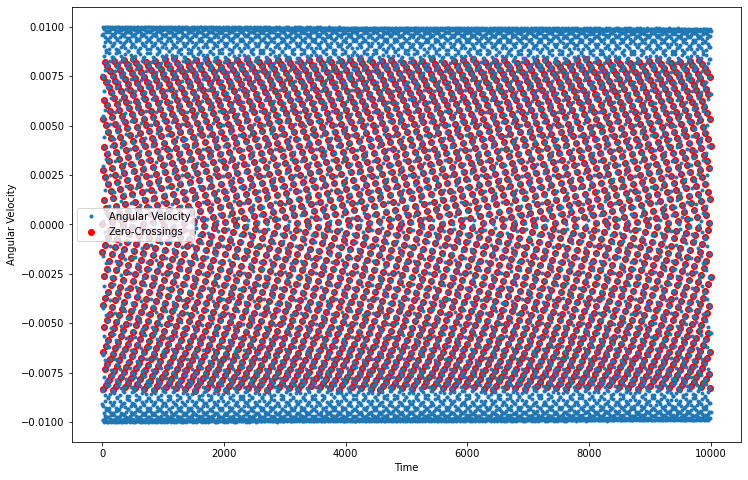

Mean Period: 3.1403894158260046 seconds


In [19]:
# Integrate the ODEs using scipy solve_ivp (method RK45 by default)
t_max = 10000
pendulum_motion = solve_ivp(pendulum, [0, t_max], [theta0, omega0], args = (g, l, q, F, OmegaD), dense_output=True)

# Obtain the motion of the pendulum
t = np.linspace(0, 10000, 10000)
theta, omega = pendulum_motion.sol(t)

# Find the zero-crossings of angular velocity to identify periods
zero_crossings = np.where(np.diff(np.sign(omega)))[0]

# Calculate periods
periods = np.diff(t[zero_crossings])

# Plot angular velocity and identified periods
plt.figure(figsize=(12, 8))
plt.plot(t, omega,'.', label='Angular Velocity')
plt.scatter(t[zero_crossings], omega[zero_crossings], color='red', label='Zero-Crossings')
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.legend()
plt.show()

# Print the mean period
mean_period = np.mean(periods)
print(f"Mean Period: {mean_period} seconds")

/Users/michael/Desktop/anaconda/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/michael/Desktop/anaconda/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'Mean Period vs Initial Displacement')

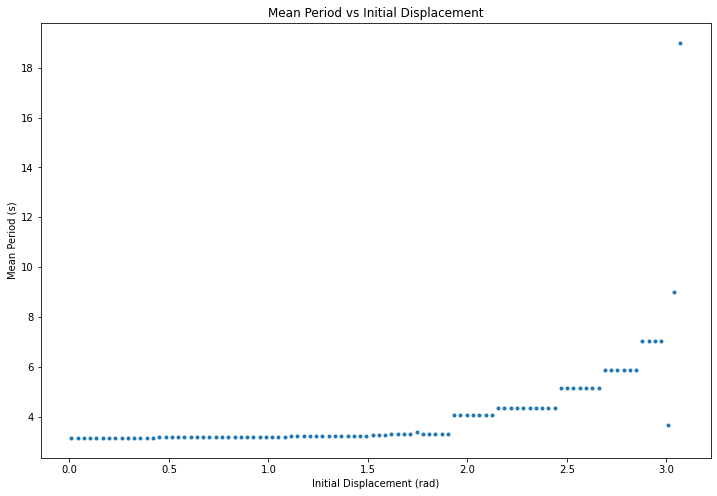

In [20]:
# Vary the amplitude i.e. initial displacement i.e. theta0 and observe how the period changes

## Define a function that finds the periods of the pendulum for different initial displacements

def find_mean_period(theta0, t_max, g, l, q, F, OmegaD):
    omega0 = 0 # Initial angular velocity set to 0
    pendulum_motion = solve_ivp(pendulum, [0, t_max], [theta0, omega0], args = (g, l, q, F, OmegaD), dense_output=True)
    t = np.linspace(0, t_max, t_max)
    theta, omega = pendulum_motion.sol(t)
    zero_crossings = np.where(np.diff(np.sign(omega)))[0]
    mean_period = np.mean(np.diff(t[zero_crossings]))
    return mean_period 

## Find the periods for different initial displacements
theta0s = np.linspace(0.01, np.pi-0.01, 100)
mean_periods = [find_mean_period(theta0, 10000, g, l, q, F, OmegaD) for theta0 in theta0s]

## Plot the periods for different initial displacements
plt.figure(figsize=(12, 8))
plt.plot(theta0s, mean_periods, '.')
plt.xlabel('Initial Displacement (rad)')
plt.ylabel('Mean Period (s)')
plt.title('Mean Period vs Initial Displacement')

Conclusion: for most small values of initial displacements (or amplitudes), the period stays at a constant $pi$ seconds, which is to be expected since for an undriven, undamped harmonic oscillator (a pendulum in this case), the period is given by 

$T = 2\pi\sqrt\frac{l}{g}$

which does not depend on the amplitude i.e. initial displacement $\theta_0$ of the oscillations.

However for higher values of $\theta_0$ the integrator breaks down and the period starts to increase, with a asymptotic rise when $\theta_0 \rightarrow \pi$. This is to be expected given the finite numerical value integration from the RK methods of the integrator.

# CORE TASK 2

### Damping on

Now we turn on some damping, say 𝑞 = 1, 5, 10, plot some results, and check that the results make sense.

In [21]:
# Define the parameters

g = 9.81 # Acceleration due to gravity
l = g # Length of the pendulum, l = g here
F = 0 # Driving force amplitude, F = G / ml^2
OmegaD = 2/3 # Frequency of the driving force (s^-1)

To keep consistency and to make sure small angle approximations are agreeing with numerical integration, we stick to the same initial conditoins of $\theta_0$ = 0.01 and $\omega_0$ = 0.0.

In [22]:
# Define the initial conditions at t = 0

theta0 = 0.01 # Initial angle
omega0 = 0.0 # Initial angular velocity

Here, q is varied, say 𝑞 = 1, 5, 10.

In [23]:
q_list = [1,5,10] # Resistive force, q = a / ml. Here it is varied.

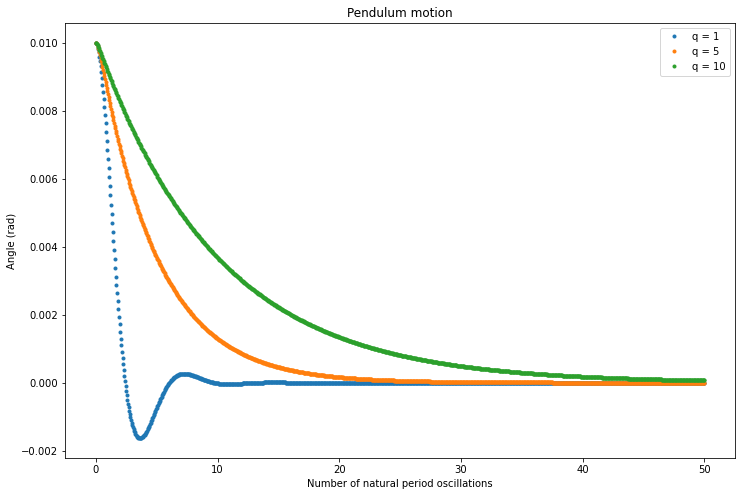

In [24]:
# Integrate the ODEs using scipy solve_ivp (method RK45 by default)

t_max = 50 #t_max = 50 is chosen as >100 do not yield any meaningful results

plt.figure(figsize=(12,8))

for i in range(len(q_list)):
    pendulum_motion = solve_ivp(pendulum, [0, t_max], [theta0, omega0], args = (g, l, q_list[i], F, OmegaD), dense_output=True)
    t = np.linspace(0, t_max, 1000)
    theta, omega = pendulum_motion.sol(t)
    plt.plot(t, theta, '.', label=f'q = {q_list[i]}')

plt.xlabel('Number of natural period oscillations')
plt.ylabel('Angle (rad)')
plt.legend()
plt.title('Pendulum motion');

Conclusion: The results make sense because light damping would still create oscillations, albeit at damped conditions. For higher damping coefficients of $q=5$ and $q=10$ we observe the absence of oscillations but rather exponential decays. For maximum damping ($q=10$) critical damping is observed.

### Driving force on

Now turn on the driving force, leaving 𝑞 = 0.5 from now on, and investigate with suitable plots the behaviour for 𝐹 = 0.5, 1.2, 1.44, 1.465.

In [76]:
# Define the parameters

g = 9.81 # Acceleration due to gravity
l = g # Length of the pendulum, l = g here
q = 0.5 # Resistive force, q = a / ml. Here it is fixed at 0.5
OmegaD = 2/3 # Frequency of the driving force (s^-1)

To keep consistency and to make sure small angle approximations are agreeing with numerical integration, we stick to the same initial conditoins of $\theta_0$ = 0.01 and $\omega_0$ = 0.0.

In [77]:
# Define the initial conditions at t = 0

theta0 = 0.01 # Initial angle
omega0 = 0.0 # Initial angular velocity

Here, F is varied, say F = 0.5, 1.2, 1.44, 1.465.

In [94]:
# F_list = [1.2]
F_list = [0.5, 1.2, 1.44, 1.465] # Driving force amplitude, F = G / ml^2. Here it is varied.

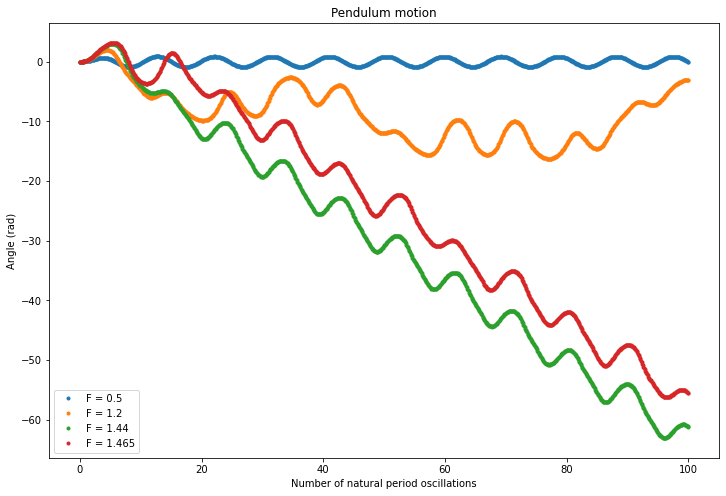

In [95]:
# Integrate the ODEs using scipy solve_ivp (method RK45 by default)

t_max = 100

plt.figure(figsize=(12,8))

for i in range(len(F_list)):
    pendulum_motion = solve_ivp(pendulum, [0, t_max], [theta0, omega0], args = (g, l, q, F_list[i], OmegaD), dense_output=True)
    t = np.linspace(0, t_max, 1000)
    theta, omega = pendulum_motion.sol(t)
    plt.plot(t, theta, '.', label=f'F = {F_list[i]}')

plt.xlabel('Number of natural period oscillations')
plt.ylabel('Angle (rad)')
plt.legend()
plt.title('Pendulum motion');

Noticed from the above plot that the period of oscillation is hard to observe with angular position due to wrap‐around at ±𝜋. Introduce a modulo function

In [96]:
def modulo(a):
    a += np.pi
    a %= 2*np.pi
    a -= np.pi
    return a

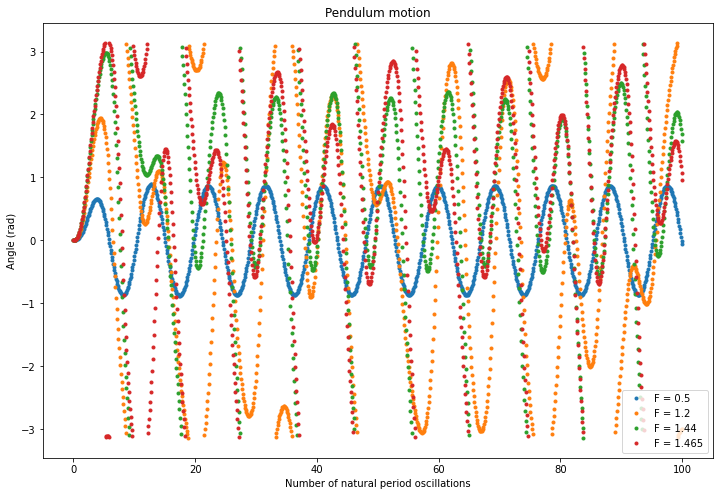

In [97]:
# Integrate the ODEs using scipy solve_ivp (method RK45 by default)

t_max = 100

plt.figure(figsize=(12,8))

for i in range(len(F_list)):
    pendulum_motion = solve_ivp(pendulum, [0, t_max], [theta0, omega0], args = (g, l, q, F_list[i], OmegaD), dense_output=True)
    t = np.linspace(0, t_max, 1000)
    theta, omega = pendulum_motion.sol(t)
    plt.plot(t, [modulo(i) for i in theta], '.', label=f'F = {F_list[i]}')

plt.xlabel('Number of natural period oscillations')
plt.ylabel('Angle (rad)')
plt.legend()
plt.title('Pendulum motion');

Plotting with angular velocities instead.

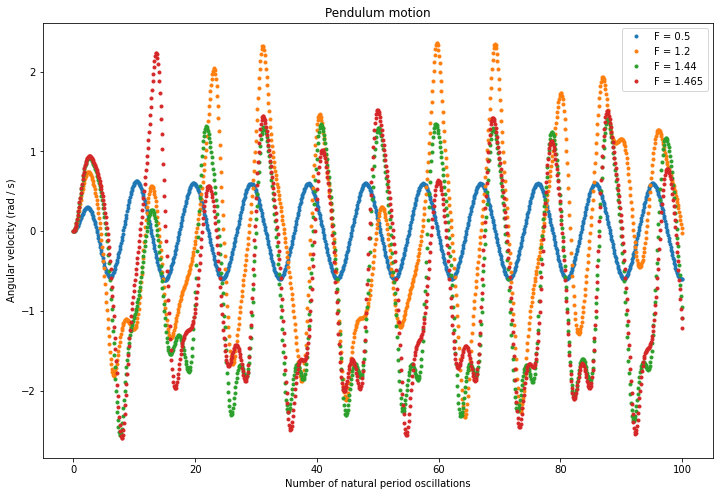

In [82]:
# Integrate the ODEs using scipy solve_ivp (method RK45 by default)

t_max = 100

plt.figure(figsize=(12,8))

for i in range(len(F_list)):
    pendulum_motion = solve_ivp(pendulum, [0, t_max], [theta0, omega0], args = (g, l, q, F_list[i], OmegaD), dense_output=True)
    t = np.linspace(0, t_max, 1000)
    theta, omega = pendulum_motion.sol(t)
    plt.plot(t, omega, '.', label=f'F = {F_list[i]}')

plt.xlabel('Number of natural period oscillations')
plt.ylabel('Angular velocity (rad / s)')
plt.legend()
plt.title('Pendulum motion');

In [83]:
# Calculate the period of oscillation for different F values in F_list

def find_mean_period(t_max, F):
    theta0 = 0.01 # Initial angular displacement set to 0.01 as usual
    omega0 = 0 # Initial angular velocity set to 0
    g = 9.81 # Acceleration due to gravity
    l = g # Length of the pendulum, l = g here
    q = 0.5 # Resistive force, q = a / ml. Here it is fixed at 0.5
    OmegaD = 2/3 # Frequency of the driving force (s^-1)
    pendulum_motion = solve_ivp(pendulum, [0, t_max], [theta0, omega0], args = (g, l, q, F, OmegaD), dense_output=True)
    t = np.linspace(0, t_max, t_max*10)
    theta, omega = pendulum_motion.sol(t)
    zero_crossings = np.where(np.diff(np.sign(omega)))[0]
    mean_period = np.mean(np.diff(t[zero_crossings]))
    return mean_period 

[4.6427379760713094, 4.757138090471424, 4.71900471900472, 4.709471376138043]


Text(0.5, 1.0, 'Mean Period vs F')

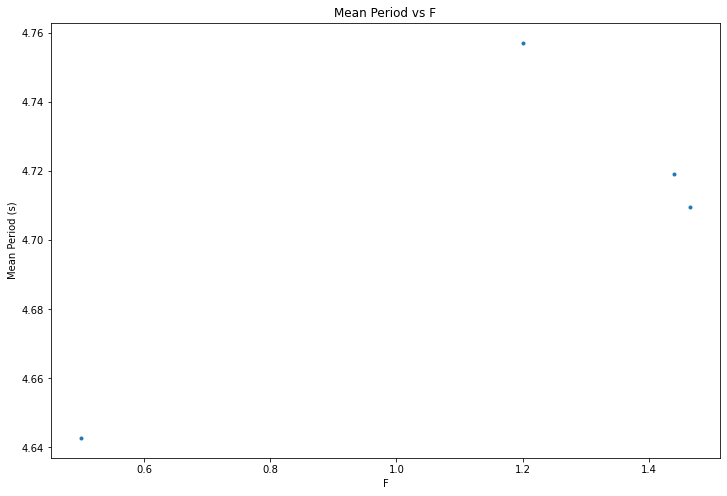

In [87]:
period_diff_f = []

for i in range(len(F_list)):
    MeanPeriod = find_mean_period(100,F_list[i])
    period_diff_f.append(MeanPeriod)

print(period_diff_f)

plt.figure(figsize=(12, 8))
plt.plot(F_list, period_diff_f, '.')
plt.xlabel('F')
plt.ylabel('Mean Period (s)')
plt.title('Mean Period vs F')


The oscillations for F=0.5 is consistent as it matches with the damping. When F=1.2 the period of oscillation increased and we also observe beat interferences in the oscillations, which is to be expected since the driving force is higher than the damping implying forced oscillations. Similarly when F=1.44 and F=1.465 we observe similar situations, albeit at a period between F=0.5 and F=1.2.

# SUPPLEMENTARY TASK 1

### Initial conditions

Investigate the sensitivity to initial conditions: compare two oscillations, one with 𝐹 = 1.2, $\theta_0$ = 0.2 and one with 𝐹 = 1.2, $\theta_0$ = 0.20001. Integrate for a ’long time’ to see if the solutions diverge or stay the same.

In [ ]:
# Define the parameters

g = 9.81 # Acceleration due to gravity
l = g # Length of the pendulum, l = g here
q = 0.5 # Resistive force, q = a / ml. Here it is fixed at 0.5
F = 1.2 # Driving force amplitude, F = G / ml^2. 
OmegaD = 2/3 # Frequency of the driving force (s^-1)

In [ ]:
# Define the initial conditions at t = 0
omega0 = 0.0 # Initial angular velocity
theta0_list = [0.02,0.020001] # Initial angle to be investigated. Here it is varied.

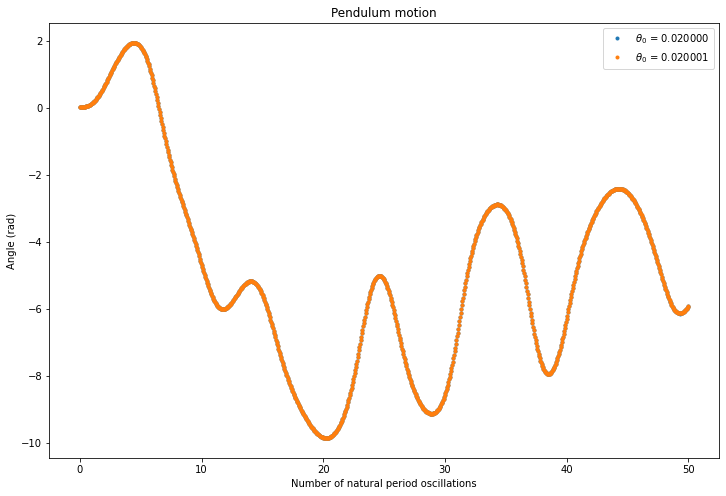

In [ ]:
# Integrate the ODEs using scipy solve_ivp (method RK45 by default)

t_max = 50

plt.figure(figsize=(12,8))

for i in range(len(theta0_list)):
    pendulum_motion = solve_ivp(pendulum, [0, t_max], [theta0_list[i], omega0], args = (g, l, q, F, OmegaD), dense_output=True)
    t = np.linspace(0, t_max, 1000)
    theta, omega = pendulum_motion.sol(t)
    plt.plot(t, theta, '.', label=r'$\theta_0$ = %.6f'%theta0_list[i])

plt.xlabel('Number of natural period oscillations')
plt.ylabel('Angle (rad)')
plt.legend()
plt.title('Pendulum motion');

For short times, the solutions stays mostly the same. Next, we consider integrating over a long time.

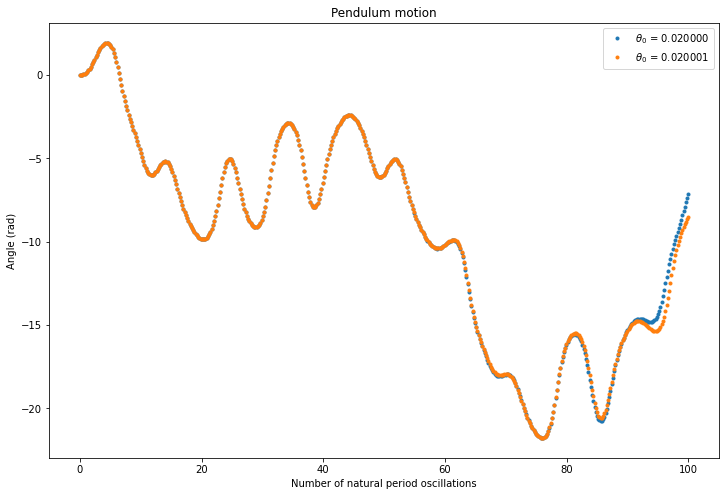

In [ ]:
# Integrate the ODEs using scipy solve_ivp (method RK45 by default)

## Change time to a longer time as commpared to before (50)
t_max = 100

plt.figure(figsize=(12,8))

for i in range(len(theta0_list)):
    pendulum_motion = solve_ivp(pendulum, [0, t_max], [theta0_list[i], omega0], args = (g, l, q, F, OmegaD), dense_output=True)
    t = np.linspace(0, t_max, 500)
    theta, omega = pendulum_motion.sol(t)
    plt.plot(t, theta, '.', label=r'$\theta_0$ = %.6f'%theta0_list[i])

plt.xlabel('Number of natural period oscillations')
plt.ylabel('Angle (rad)')
plt.legend()
plt.title('Pendulum motion');

Now we start to see more divergence. Next let's consider even longer times.

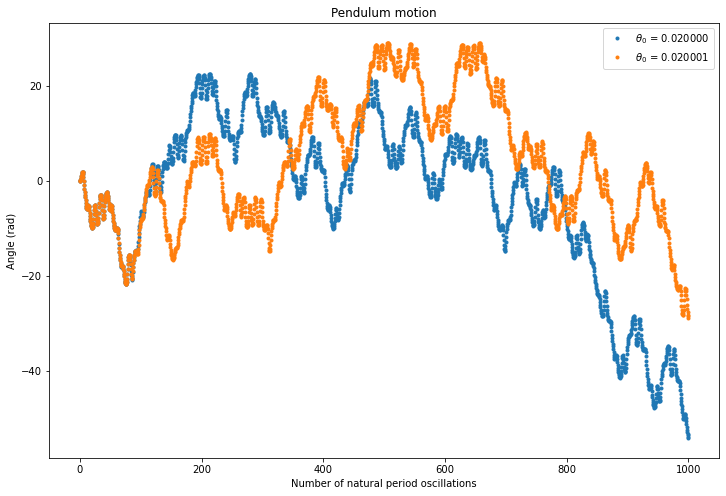

In [ ]:
# Integrate the ODEs using scipy solve_ivp (method RK45 by default)

## Change time to a longer time as commpared to before (100)
t_max = 1000

plt.figure(figsize=(12,8))

for i in range(len(theta0_list)):
    pendulum_motion = solve_ivp(pendulum, [0, t_max], [theta0_list[i], omega0], args = (g, l, q, F, OmegaD), dense_output=True)
    t = np.linspace(0, t_max, 2000)
    theta, omega = pendulum_motion.sol(t)
    plt.plot(t, theta, '.', label=r'$\theta_0$ = %.6f'%theta0_list[i])

plt.xlabel('Number of natural period oscillations')
plt.ylabel('Angle (rad)')
plt.legend()
plt.title('Pendulum motion');

At oscillations times more than a 100 natural periods, the solutions start to diverge.

# SUPPLEMENTARY TASK 2

### Phase space

Try plotting angle versus angular speed for various solutions, to compare the type of behaviour in various regimes: you can investigate chaotic behaviour using this simple code — have a look in the books or a web site for examples. There is a nice demo for example at http://www.myphysicslab.com. There’s lots more physics to be explored here — experiment if you have time!

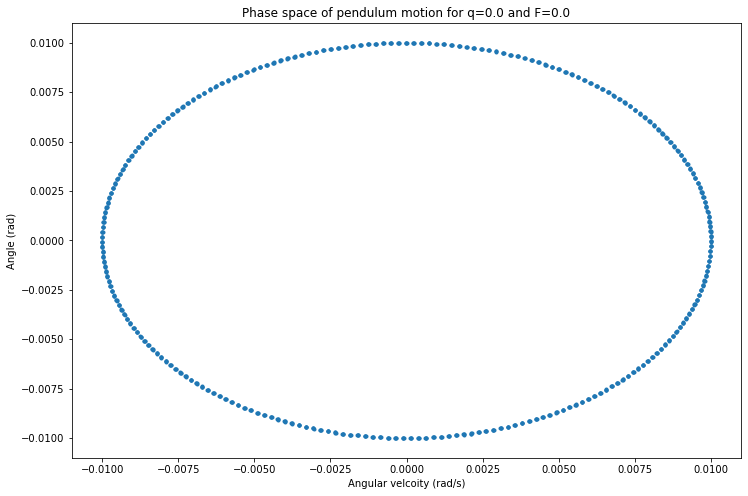

In [73]:
# Define the parameters

g = 9.81 # Acceleration due to gravity
l = g # Length of the pendulum, l = g here
q = 0.0 # Resistive force, q = a / ml. Here it is fixed at 0.5
F = 0.0 # Driving force amplitude, F = G / ml^2. 
OmegaD = 2/3 # Frequency of the driving force (s^-1)

# Define the initial conditions at t = 0

theta0 = 0.01 # Initial angle
omega0 = 0.0 # Initial angular velocity

# Integrate the ODEs using scipy solve_ivp (method RK45 by default)

t_max = 100
pendulum_motion = solve_ivp(pendulum, [0, t_max], [theta0, omega0], args = (g, l, q, F, OmegaD), dense_output=True)

# Plot the motion of the pendulum

t = np.linspace(0, t_max, 1000)
theta, omega = pendulum_motion.sol(t)

plt.figure(figsize=(12, 8))
plt.plot(omega, theta, '.')
plt.xlabel('Angular velcoity (rad/s)')
plt.ylabel('Angle (rad)')
plt.title('Phase space of pendulum motion for q=%.1f and F=%.1f'%(q,F));

As expected, a circle is produced for an undamped and undriven oscillator.


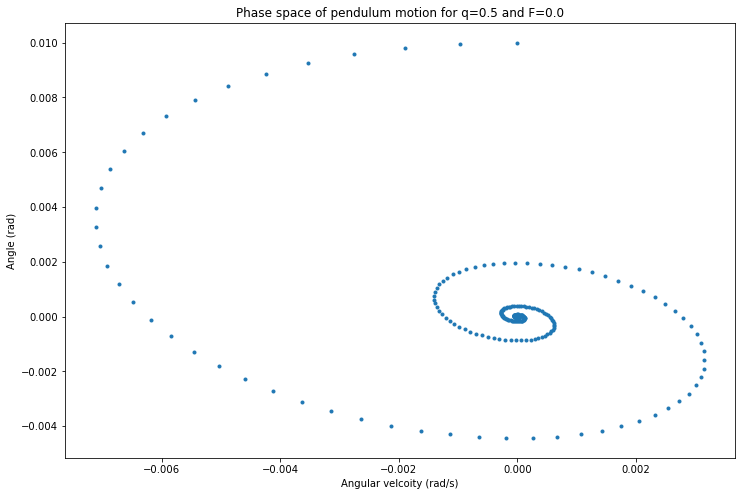

In [ ]:
# Define the parameters

g = 9.81 # Acceleration due to gravity
l = g # Length of the pendulum, l = g here
q = 0.5 # Resistive force, q = a / ml. Here it is fixed at 0.5
F = 0.0 # Driving force amplitude, F = G / ml^2. 
OmegaD = 2/3 # Frequency of the driving force (s^-1)

# Define the initial conditions at t = 0

theta0 = 0.01 # Initial angle
omega0 = 0.0 # Initial angular velocity

# Integrate the ODEs using scipy solve_ivp (method RK45 by default)

t_max = 100
pendulum_motion = solve_ivp(pendulum, [0, t_max], [theta0, omega0], args = (g, l, q, F, OmegaD), dense_output=True)

# Plot the motion of the pendulum

t = np.linspace(0, t_max, 1000)
theta, omega = pendulum_motion.sol(t)

plt.figure(figsize=(12, 8))
plt.plot(omega, theta, '.')
plt.xlabel('Angular velcoity (rad/s)')
plt.ylabel('Angle (rad)')
plt.title('Phase space of pendulum motion for q=%.1f and F=%.1f'%(q,F));

Similarly, a spiral shape is shown for a damped oscillatory motion, with both angular velocity and angle ending at zero.

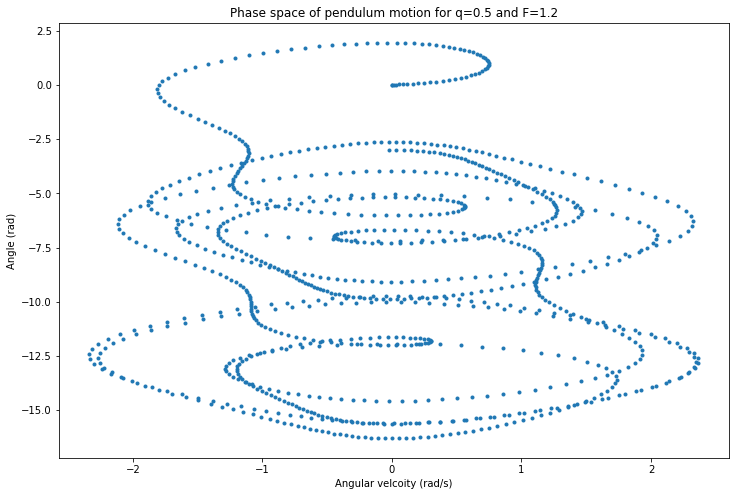

In [ ]:
# Define the parameters

g = 9.81 # Acceleration due to gravity
l = g # Length of the pendulum, l = g here
q = 0.5 # Resistive force, q = a / ml. Here it is fixed at 0.5
F = 1.2 # Driving force amplitude, F = G / ml^2. 
OmegaD = 2/3 # Frequency of the driving force (s^-1)

# Define the initial conditions at t = 0

theta0 = 0.01 # Initial angle
omega0 = 0.0 # Initial angular velocity

# Integrate the ODEs using scipy solve_ivp (method RK45 by default)

t_max = 100
pendulum_motion = solve_ivp(pendulum, [0, t_max], [theta0, omega0], args = (g, l, q, F, OmegaD), dense_output=True)

# Plot the motion of the pendulum

t = np.linspace(0, t_max, 1000)
theta, omega = pendulum_motion.sol(t)

plt.figure(figsize=(12, 8))
plt.plot(omega, theta, '.')
plt.xlabel('Angular velcoity (rad/s)')
plt.ylabel('Angle (rad)')
plt.title('Phase space of pendulum motion for q=%.1f and F=%.1f'%(q,F));

For F > q, the phase space displays chaotic behaviour with no trend in phase space points.